In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [25]:
dd = pd.read_csv('uo_nn_batch_590152-171251704.csv', sep=";")
dd.columns = dd.columns.str.replace(' ', '')

# convert Lk from string to np.array, separated by comma
dd['Lk'] = dd['Lk'].apply(lambda x: np.array(x.split(','), dtype=float))

dd.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Lk
0,1,0.00,1,84,0.1511,100.0,99.6,5.810000e-07,"[0.25, 0.1437, 0.055989, 0.010159, 0.0068473, ..."
1,1,0.00,3,50,0.1369,100.0,99.6,1.380000e-35,"[0.25, 0.1437, 0.055619, 0.0077025, 0.0038855,..."
2,1,0.00,7,1625,0.0340,100.0,100.0,1.200000e-03,"[0.0012405, 0.0024928, 0.0011406, 0.0014767, 0..."
3,1,0.01,1,55,0.1091,99.6,100.0,2.760000e-02,"[0.25, 0.14435, 0.059258, 0.035652, 0.030432, ..."
4,1,0.01,3,47,0.1256,99.6,100.0,2.760000e-02,"[0.25, 0.14435, 0.058861, 0.033117, 0.028247, ..."


In [26]:
def show_heatmap(df, isd, val, log:bool = False):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        if log:
            t = np.log(t)
        sns.heatmap(t, annot=True, fmt=".1f", linewidths=.5)

def plot_val(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(1, 11):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)

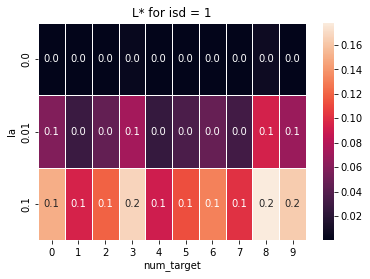

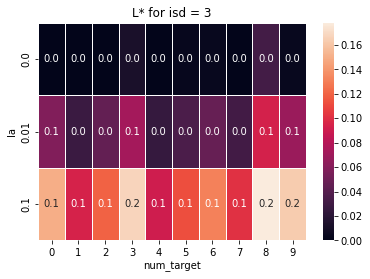

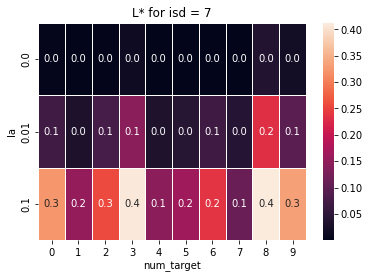

In [27]:
# show heatmaps for isd = 1, 3, 7
par = 'L*'
for i in [1, 3, 7]:
    show_heatmap(dd, i, par)
    plt.title(f'{par} for isd = ' + str(i))
    plt.show()

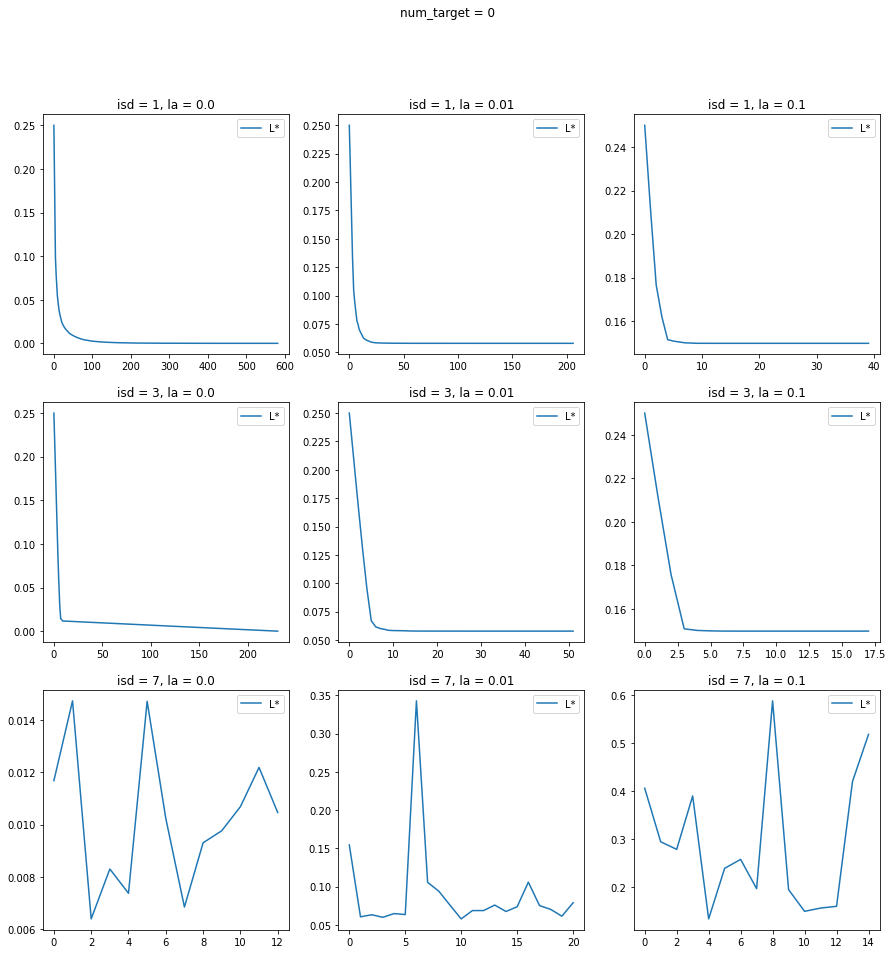

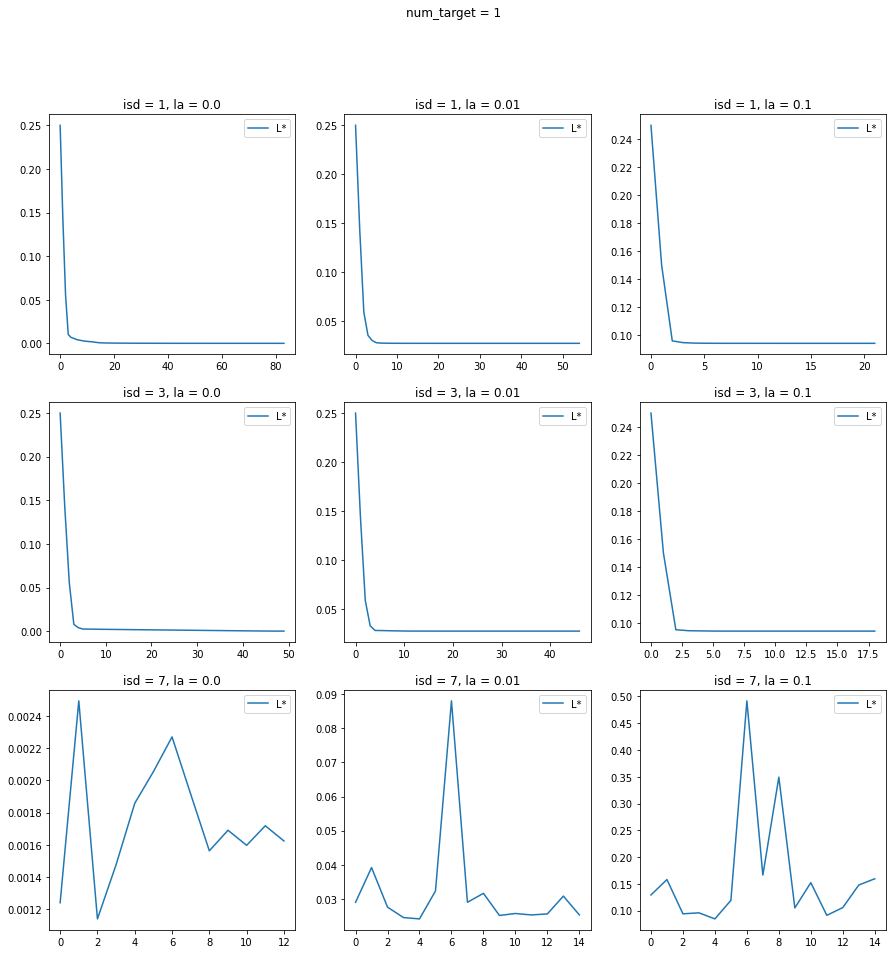

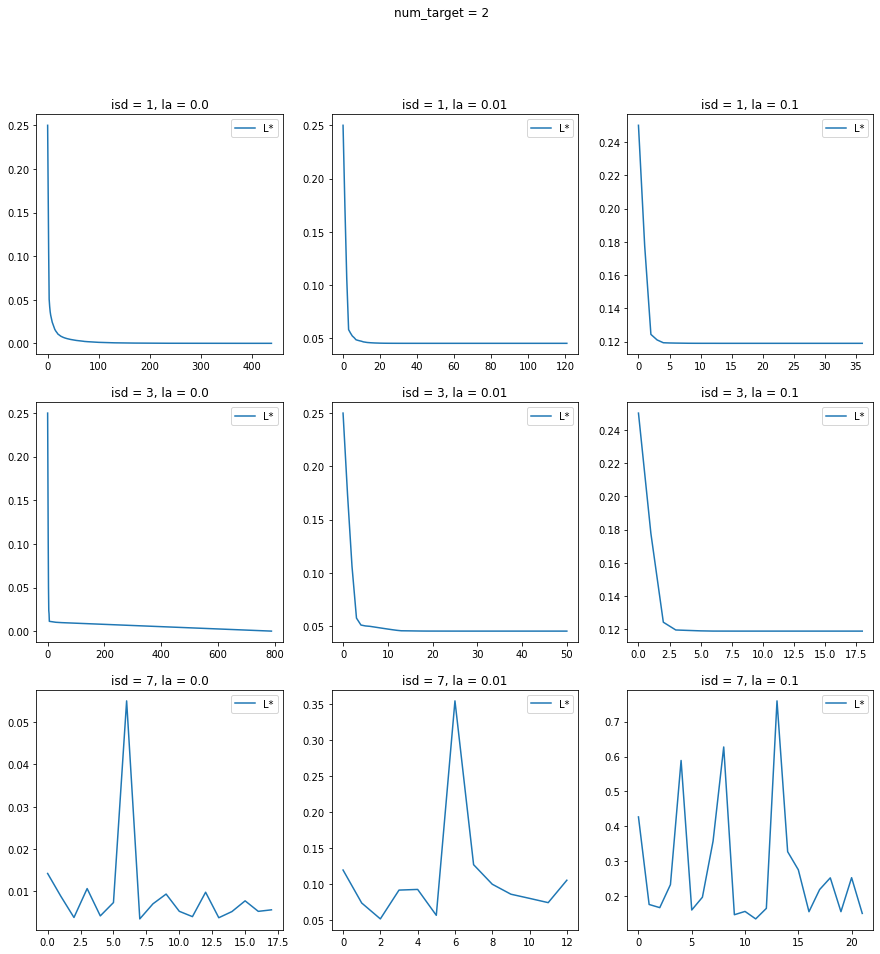

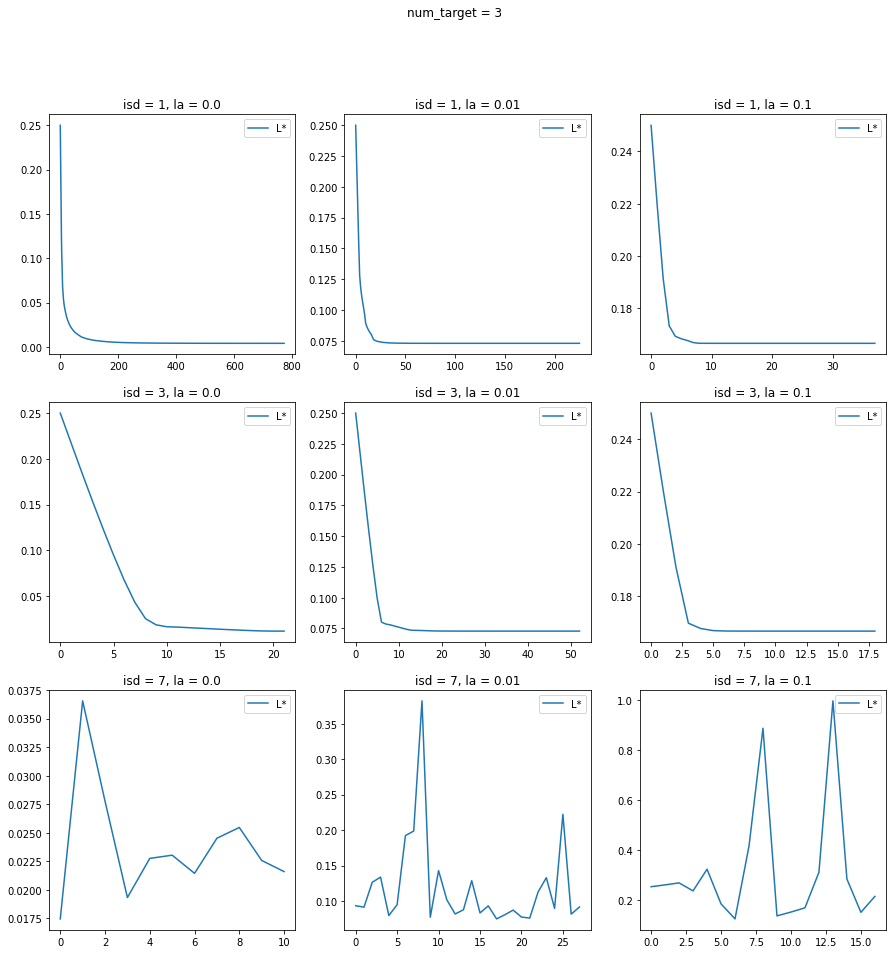

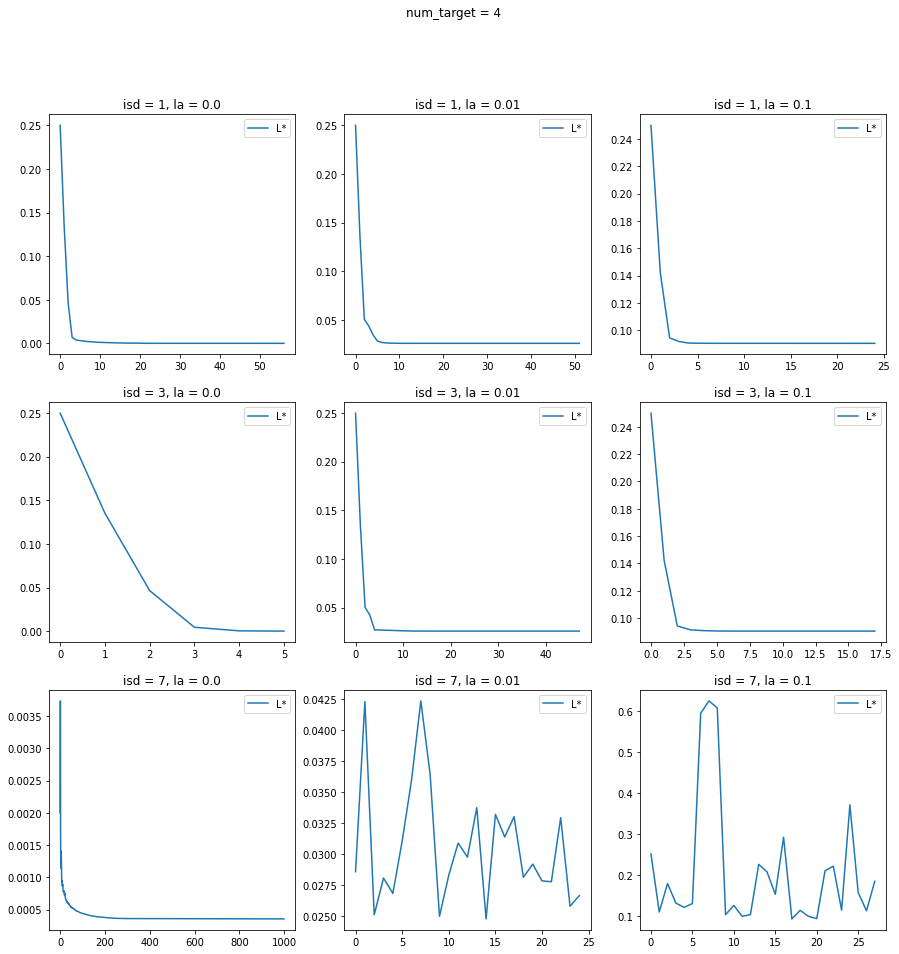

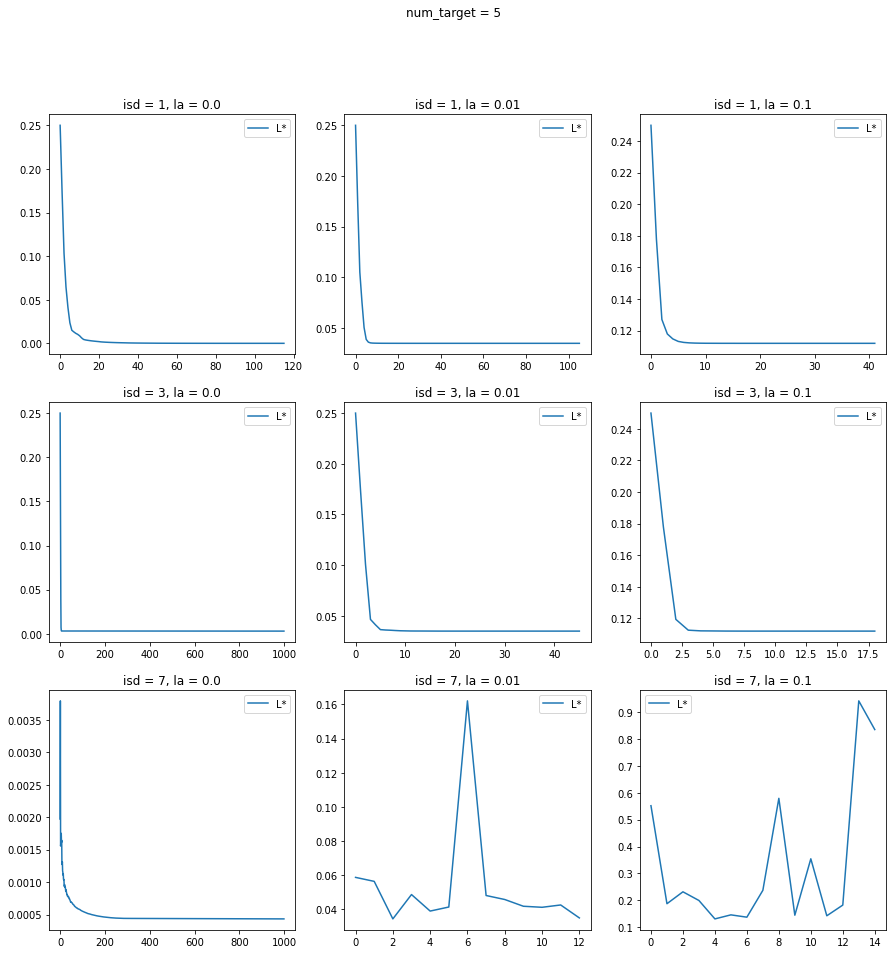

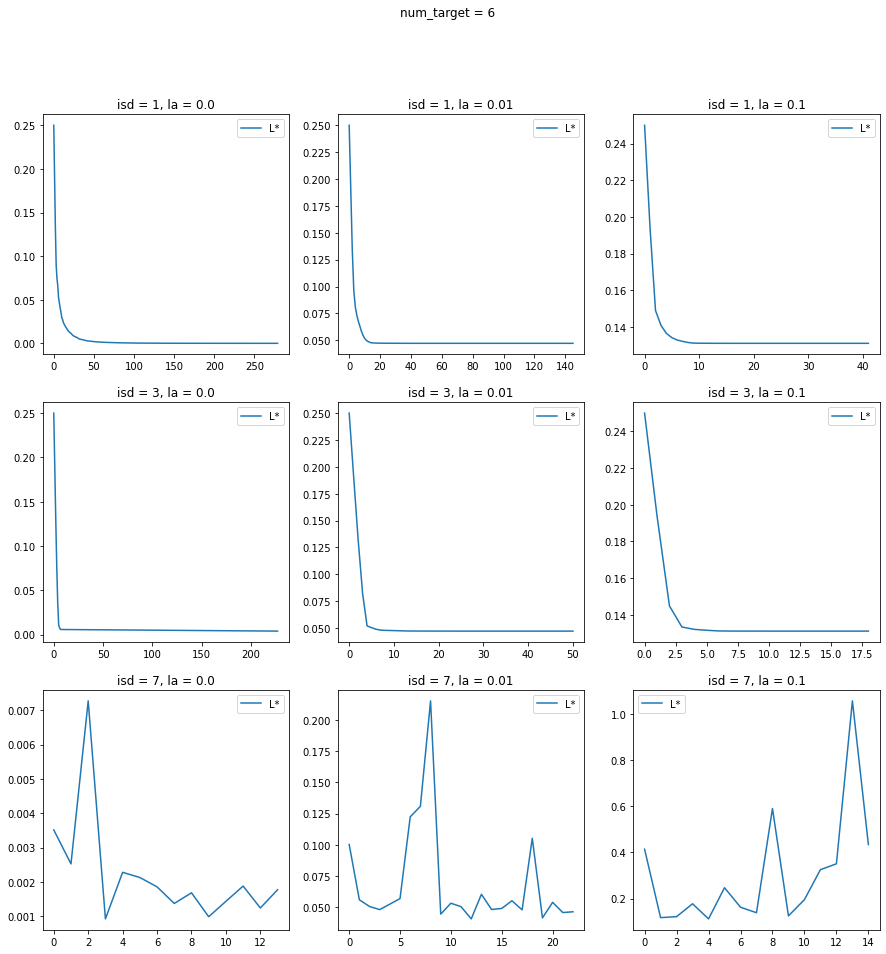

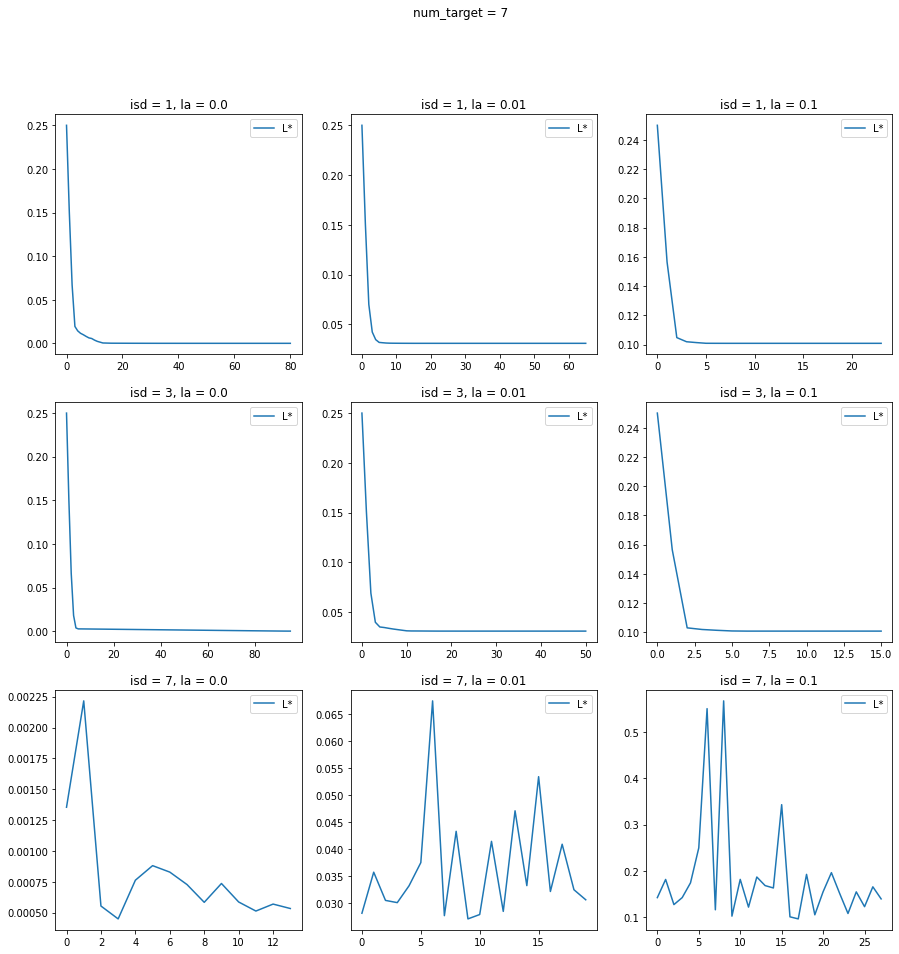

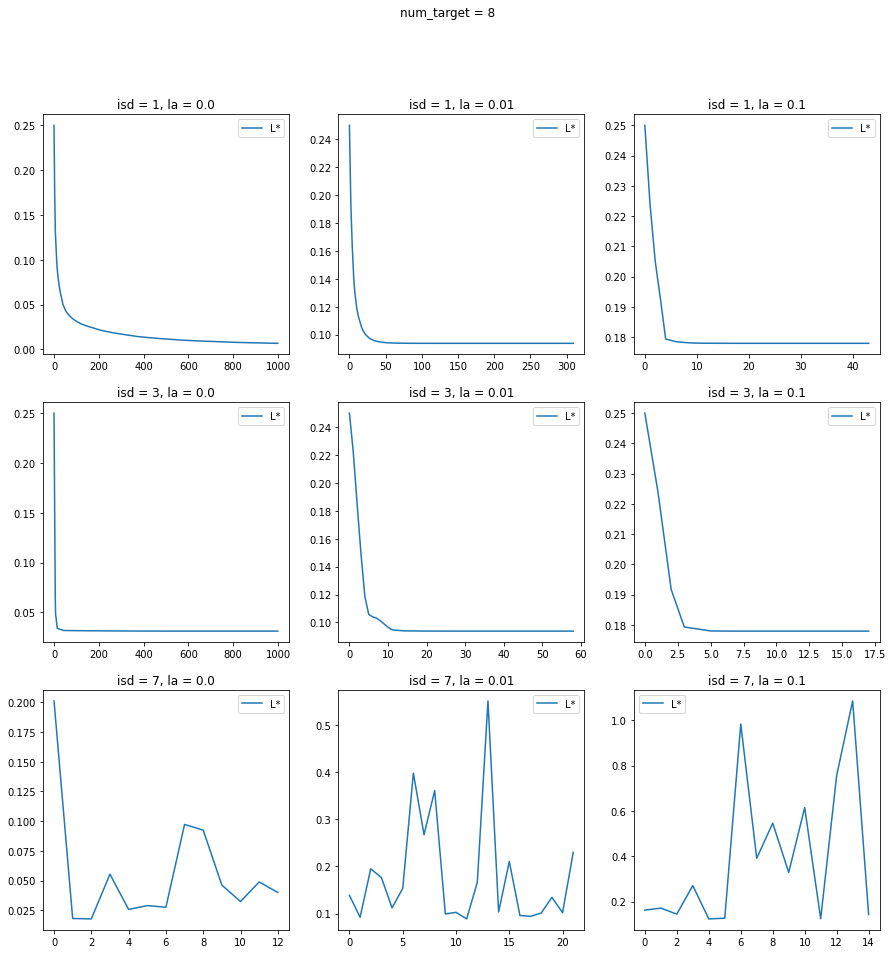

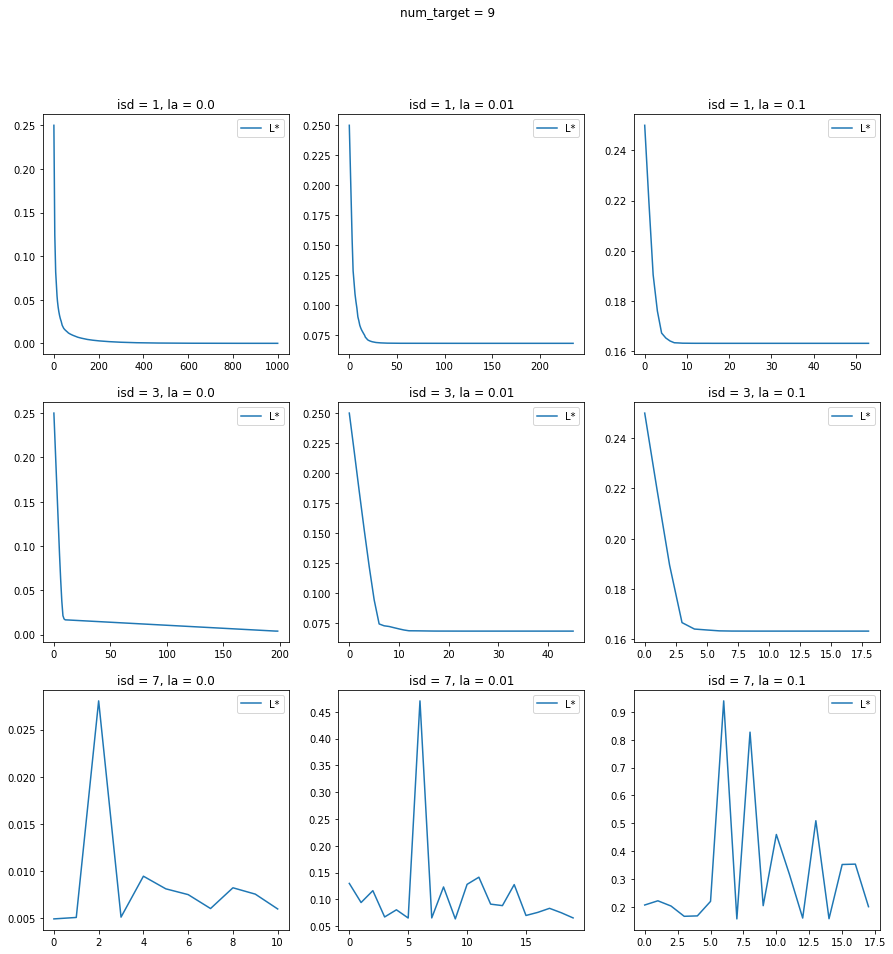

In [28]:
for num_target in range(10): 
    # plot for every isd and la
    # show plots in a grid 3*3
    fig, axs = plt.subplots(len(dd['isd'].unique()), len(dd['la'].unique()), figsize=(15, 15))
    for i, isd in enumerate(dd['isd'].unique()):
        for j, la in enumerate(dd['la'].unique()):
            t = dd[(dd['isd'] == isd) & (dd['la'] == la) & (dd['num_target'] == num_target)]
            axs[i, j].plot(t['Lk'].values[0], label='L*')
            axs[i, j].set_title(f'isd = {isd}, la = {la}')
            axs[i, j].legend()
    
    plt.suptitle(f'num_target = {num_target}')
    plt.show()